<a href="https://colab.research.google.com/github/ivanhegiansyah/Genetic_Algorithm/blob/main/Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import math
import matplotlib.pyplot as plt

In [ ]:
def out_pop(panjang_krom, n):
  pop = []

  for i in range(n):
    krom = []
    for j in range(panjang_krom):
      krom.append(random.randint(0, 1))

    pop.append(krom)
  
  return pop

In [ ]:
def decode_krom(krom, xr, yr):
  
  #titik potong krommosom x, y
  setengah_krom = len(krom) // 2

  #hitung bagian bawah 
  bawah = sum([2 ** -(i) for i in range(1, setengah_krom + 1)])
  
  #menghitung bagian terkanan rumus
  kx = 0
  krom_x = krom[:setengah_krom]
  for i in range(1, setengah_krom + 1):
    kx += krom_x[i-1] * (2 ** -i)

  #menghitung bagian terkanan rumus
  ky = 0
  krom_y = krom[setengah_krom:]
  for i in range(1, setengah_krom + 1):
    ky += krom_y[i-1] * (2 ** -i)

  #hitung x, y
  x = xr["min"] + (((xr["max"] - xr["min"]) * kx) / bawah)
  y = yr["min"] + (((yr["max"] - yr["min"]) * ky) / bawah)

  return x, y

In [ ]:
#mencari nilai maksimum dari fungsi
def fitness(x, y):

  return f(x, y)

In [ ]:
def parent_selection(pop, fit_pop):
  n = len(pop)

  #nilai fitness dinormalisasi
  min_ = min(fit_pop)
  max_ = max(fit_pop)
  for i in range(n):
    if (max_ - min_) != 0:
      fit_pop[i] = (fit_pop[i] - min_) / (max_ - min_)
    else:
      fit_pop[i] = 1

  #hitung total dari semua fitness populasi
  total_fit = sum(fit_pop)

  #roulette wheel selection
  ortu = []
  while len(ortu) != 2:
    r, i = random.random(), -1
    while r > 0:
      i = i + 1
      r = r - (fit_pop[i] / total_fit)
    ortu.append(pop[i])
  
  return ortu

In [ ]:
def crossover(ortu):
  #Two Point Crossover
  panjang_krom = len(ortu[0])

  cross_point1 = random.randint(0, panjang_krom//3)
  cross_point2 = random.randint(cross_point1+1, panjang_krom)

  anak = [[], []]
  anak[0] = ortu[0][:cross_point1] + ortu[1][cross_point1:cross_point2] + ortu[0][cross_point2:]
  anak[1] = ortu[1][:cross_point1] + ortu[0][cross_point1:cross_point2] + ortu[1][cross_point2:]

  return anak

In [ ]:
def mutation(anak, prob):
  #Bit-Level Mutation
  panjang_krom = len(anak[0])

  for i in range(2):
    for j in range(panjang_krom):
      if random.random() <= prob:
        anak[i][j] = [0, 1][not anak[i][j] ]

  return anak

In [ ]:
#parameter
prob_crossover, prob_mutasi = 0.7, 0.1
panjang_krom, n_pop = 8, 8
n_elitisme = 2

In [ ]:
#fungsi
def f(x, y):
  return (math.cos(x**2) * math.sin(y**2)) + (x + y)

xr = {"min" : -1, "max" : 2}
yr = {"min" : -1, "max" : 1}

In [ ]:
seed = 8
random.seed(seed)

generasi = 50 
terbaik = []
pop = out_pop(panjang_krom, n_pop)

for i in range(generasi):
  fit_pop = []
  for krom in pop:
    x, y = decode_krom(krom, xr, yr)
    fit_pop.append(fitness(x, y))
  
  terbaik.append( max(fit_pop) )

  sorted_pop = [k for _, k in sorted(zip(fit_pop, pop), reverse=True)]

  new_pop = sorted_pop[:n_elitisme]

  if (i + 1) % 5 == 0:
    print("Generasi ke-",i + 1, "Terbaik :",terbaik[i])

  while len(new_pop) <= n_pop:

    ortu = parent_selection(pop, fit_pop)

    if random.random() < prob_crossover:
      anak = mutation(crossover(ortu), prob_mutasi)
    else:
      new_pop += ortu 

    new_pop = new_pop + anak
  
  pop = new_pop + []

Generasi ke- 5 Terbaik : 2.3697381946251177
Generasi ke- 10 Terbaik : 2.420586710403935
Generasi ke- 15 Terbaik : 2.4499778586384973
Generasi ke- 20 Terbaik : 2.4499778586384973
Generasi ke- 25 Terbaik : 2.454648713412841
Generasi ke- 30 Terbaik : 2.454648713412841
Generasi ke- 35 Terbaik : 2.474940307297132
Generasi ke- 40 Terbaik : 2.474940307297132
Generasi ke- 45 Terbaik : 2.474940307297132
Generasi ke- 50 Terbaik : 2.474940307297132


In [ ]:
#mencari x, y terbaik
print("nilai x dan y terbaik =",decode_krom(sorted_pop[0], xr, yr))

nilai x dan y terbaik = (0.8, 1.0)


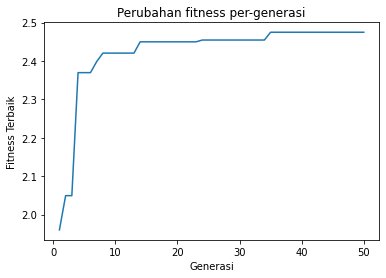

In [ ]:
#melihat pertumbuhan fitness terbaik
plt.plot(range(1, generasi+1), terbaik)
plt.title("Perubahan fitness per-generasi")
plt.xlabel("Generasi")
plt.ylabel("Fitness Terbaik")
plt.show()